### Naive Bayes Intuition :  

In [1]:
#It is a classification technique based on Bayes Theorem. In simple terms, it is a probabilistic classifier which assumes that 
#the presence of a particular feature in a class is not related to the presence of other features. It calculates the Posterior 
#probability of all the events using the Bayes Theorem. Then it takes the event that has the maximum posterior probability.

In [ ]:
# To clear the idea, lets have a look at the Bayes Theorem.

#          P(D\H)P(H)
#P(H/D) = ------------
#            P(D)     


#Here,
#P (H | D) = The conditional probability for event H to occur given that event D has occurred. This is known as the Posterior
#probability.

#P (H) and P (D) = The probability of event H and D to occur without depending on each other.

In [2]:
import numpy as np
import pandas as pd

In [15]:
data = pd.read_csv('iris.csv')

In [16]:
data.head()

,sepal_length,sepal_length.1,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
data.tail()

,sepal_length,sepal_length.1,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length      150 non-null float64
sepal_length.1    150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [21]:
x = data.iloc[:,:4]
x.head()

,sepal_length,sepal_length.1,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
x.ndim

2

In [59]:
y = data.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [60]:
y.ndim

1

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [63]:
x_train.head()

,sepal_length,sepal_length.1,petal_length,petal_width
131,7.9,3.8,6.4,2.0
113,5.7,2.5,5.0,2.0
101,5.8,2.7,5.1,1.9
81,5.5,2.4,3.7,1.0
29,4.7,3.2,1.6,0.2


In [64]:
y_train.head()

131     virginica
113     virginica
101     virginica
81     versicolor
29         setosa
Name: species, dtype: object

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
model =  GaussianNB()

In [67]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
model.score(x_train,y_train)*100


94.28571428571428

In [69]:
# predict the output
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica'],
      dtype='<U10')

In [70]:
y_pred.shape

(45,)

In [71]:
y_test.shape

(45,)

In [72]:
df = pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
66,versicolor,versicolor
17,setosa,setosa
64,versicolor,versicolor
99,versicolor,versicolor
112,virginica,virginica
26,setosa,setosa
84,versicolor,versicolor
31,setosa,setosa
108,virginica,virginica
75,versicolor,versicolor


In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

In [75]:
np.unique(y_pred)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

Text(83.40000000000006, 0.5, 'Predicted')

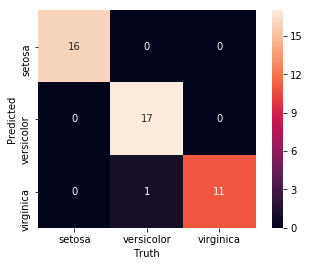

In [79]:
mat = confusion_matrix(y_pred,y_test)
names = np.unique(y_pred)
sns.heatmap(mat,square=True,annot=True,fmt='d',xticklabels=['setosa', 'versicolor', 'virginica'],yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')